In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_excel('Dataset.xlsx')

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


### Data cleaning
1. Null value treatment
2. Remove irrelevant rows
3. fix data types
4. Outlier treatment


In [7]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [8]:
df.dropna(inplace=True)  # Null value treatment

In [9]:
df.shape

(11554, 34)

In [10]:
df.drop('PolicyNumber',axis=1,inplace=True) # remove irrelevant columns and rows

In [11]:
# fix data types
df1=df.copy()
df1.head(1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421


In [12]:
df1['DriverRating'].dtype,df1['Age'].dtype,df1['Year'].dtype

(dtype('float64'), dtype('float64'), dtype('int64'))

In [13]:
df1['Age'] = df1['Age'].astype("int")
df1['Year'] = df1['Year'].astype("object")  # object is nothing but string 
df1['WeekOfMonth'] = df1['WeekOfMonth'].astype("object")
df1['WeekOfMonthClaimed'] = df1['WeekOfMonthClaimed'].astype("object")
df1['DriverRating'] = df1['DriverRating'].astype("int") # float to int

In [14]:
# outlier treatment
df1.describe()

,Age,FraudFound_P,RepNumber,Deductible,DriverRating,ClaimSize
count,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000
mean,39.899342,0.059287,8.470313,407.625065,2.493336,22969.869228
std,13.591600,0.236171,4.619424,43.417411,1.118140,26997.045641
min,0.000000,0.000000,1.000000,300.000000,1.000000,0.000000
25%,31.000000,0.000000,4.000000,400.000000,1.000000,4148.845001
50%,38.000000,0.000000,8.000000,400.000000,2.000000,8131.216984
75%,49.000000,0.000000,12.000000,400.000000,3.000000,46490.043270
max,80.000000,1.000000,16.000000,700.000000,4.000000,141394.159289


In [15]:
def plot(col):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(y=col,data=df1,ax=ax[0])
    sns.distplot(df1[col],color='red',hist=False)
    plt.suptitle('Distribution of '+col)

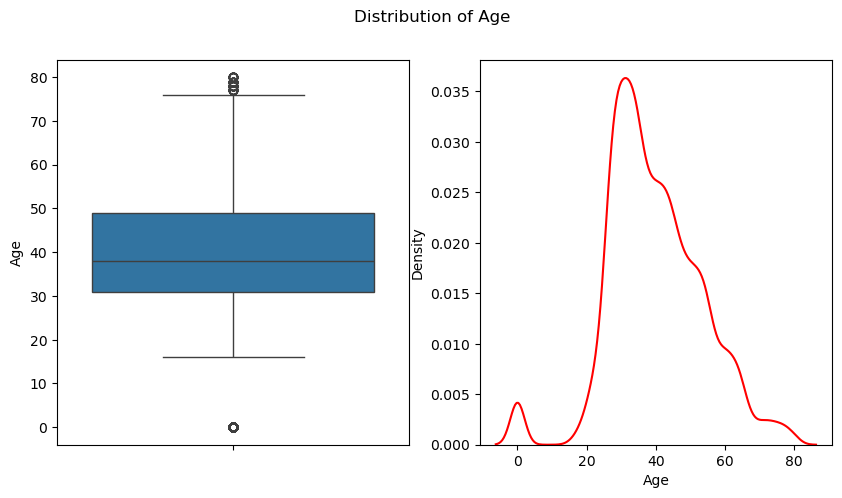

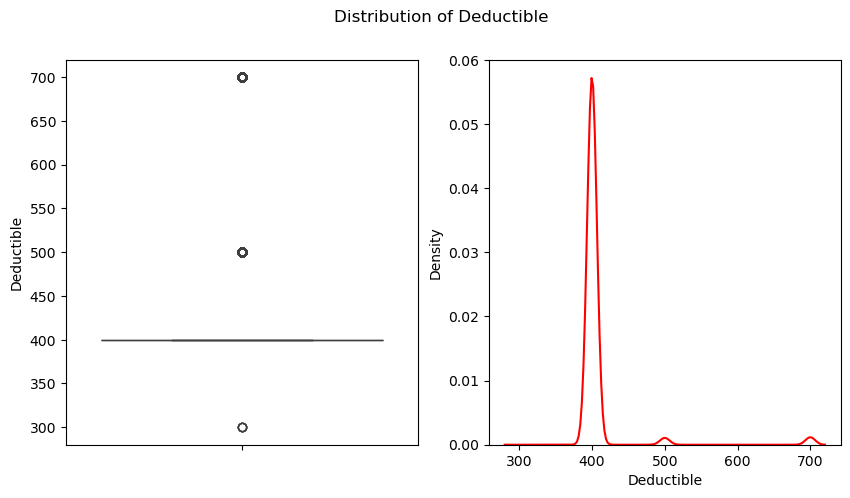

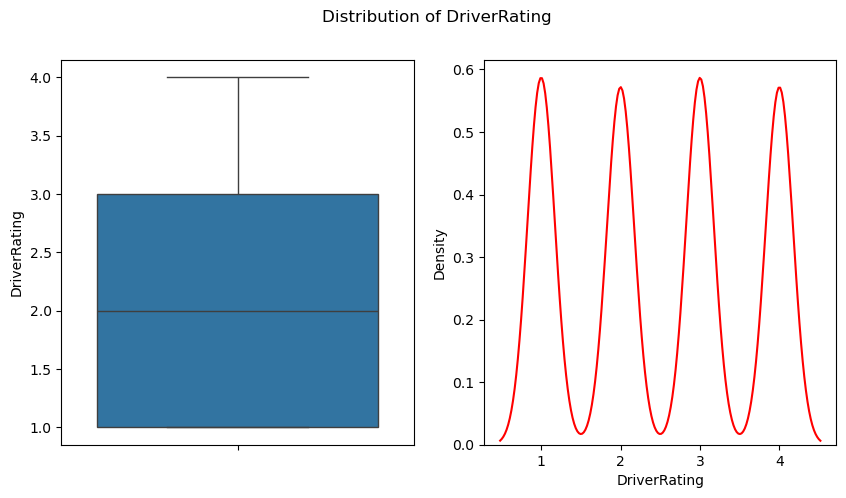

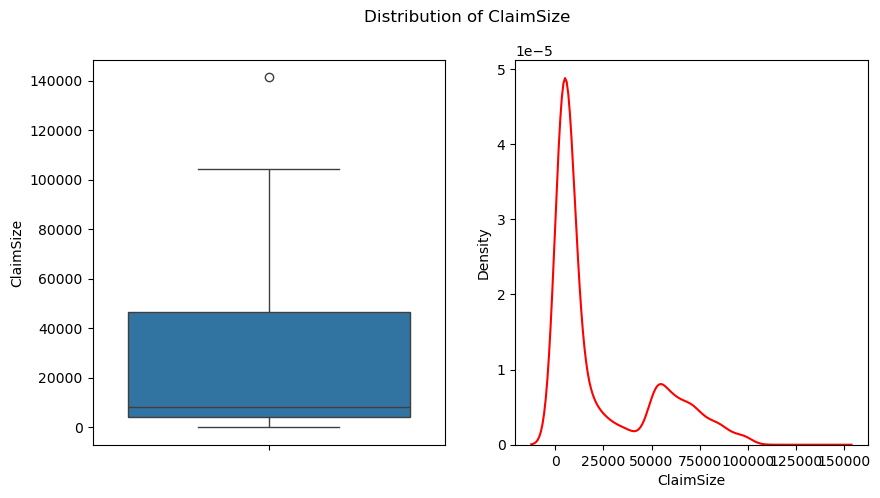

In [16]:
num_col=['Age','Deductible','DriverRating','ClaimSize']
for col in num_col:
    plot(col)

1. Age distribution has values < 16 which is incorrect as per legal reasons , removal of these outliers.
2. The minimum for claimsize if seen to be 0 which does not make sense, should remove this outlier. And the Claimsize value is large compared to the other columns log transformation was used to address the outliers in the data.


In [17]:
for col in num_col:
    print(df1[[col,'FraudFound_P']].groupby(['FraudFound_P']).agg(['min','max','mean','median']))
    print('----------------------------------------')

             Age                      
             min max       mean median
FraudFound_P                          
0              0  80  40.009200   38.0
1              0  78  38.156204   36.0
----------------------------------------
             Deductible                        
                    min  max        mean median
FraudFound_P                                   
0                   300  700  407.277578  400.0
1                   300  700  413.138686  400.0
----------------------------------------
             DriverRating                     
                      min max      mean median
FraudFound_P                                  
0                       1   4  2.490846    2.0
1                       1   4  2.532847    3.0
----------------------------------------
               ClaimSize                                          
                     min            max          mean       median
FraudFound_P                                                      
0     

In [18]:
df1 = df1[df1['Age'] > 15]
df1 =  df1[df1['ClaimSize'] > 0.0]

In [19]:
df1['ClaimSize'] = np.round(np.log(df1['ClaimSize']), 4)

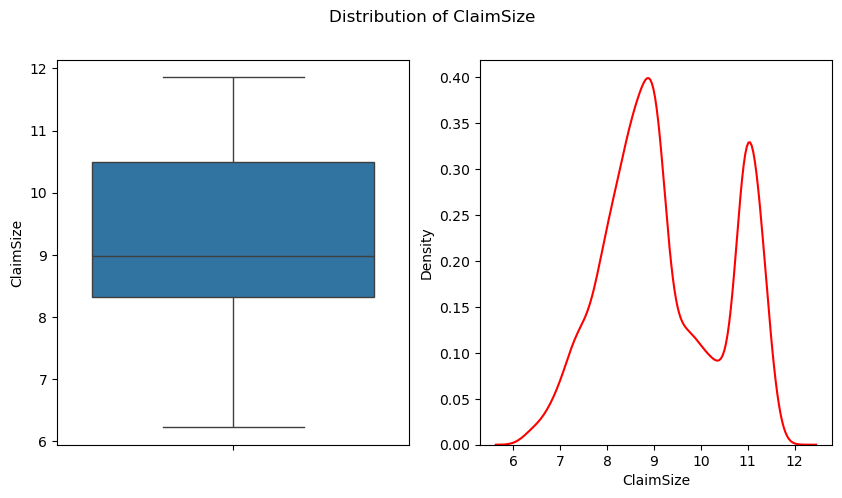

In [20]:
plot('ClaimSize') # After log transformation

In [21]:
for col in df1.columns:
    print(pd.crosstab(df1.FraudFound_P,df1[col]))
    print('---------------------------------------------------------------------------------')

Month         Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
FraudFound_P                                                            
0             871  781  904  853  937  882  905  892  928  874  919  890
1              56   63   42   57   64   44   57   71   70   29   49   57
---------------------------------------------------------------------------------
WeekOfMonth      1     2     3     4     5
FraudFound_P                              
0             2192  2446  2532  2344  1122
1              136   163   166   121    73
---------------------------------------------------------------------------------
DayOfWeek     Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
FraudFound_P                                                                
0               1686    1820      1347    1212      1505     1611       1455
1                112     119        91      87        90       89         71
----------------------------------------------------------------

In [22]:
df1['FraudFound_P'].value_counts()

FraudFound_P
0    10636
1      659
Name: count, dtype: int64

### Feature Engineering
Feature engineering: 
1. Feature encoding: Categorical variables encoding to numerical values or dummy variables.
2. Feature selection: Selecting a subset of features that are very important
3. Rescaling features (applied to numerical features):
       1. Standardisation or normalisation
       2. Min-Max scaling
4. Dimensionality reduction - PCA, Feature Importance

In [23]:
X = pd.get_dummies(df1.drop('FraudFound_P', axis=1), drop_first=True) # feature encoding

In [24]:
X.shape

(11295, 127)

In [25]:
corr_matrix = X.corr()

In [26]:
corr_matrix

,Age,RepNumber,Deductible,DriverRating,ClaimSize,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
Age,1.000000,-0.002609,0.058872,0.000908,0.035627,-0.002110,-0.016935,0.011810,-0.000401,0.002969,...,0.004924,-0.001209,0.000521,-0.011369,0.019410,-0.008987,0.012924,0.001516,-0.099331,-0.004144
RepNumber,-0.002609,1.000000,0.002950,0.011037,0.013745,0.012084,-0.005033,-0.012962,-0.006698,0.004515,...,-0.002253,-0.017182,-0.007062,-0.000368,-0.009748,0.005167,-0.001125,0.011440,-0.007161,-0.001782
Deductible,0.058872,0.002950,1.000000,0.015518,-0.002736,0.004734,-0.005672,0.009654,-0.002895,-0.012671,...,-0.130523,-0.003346,0.004306,-0.014373,0.007475,-0.001673,0.001417,-0.001401,-0.014976,0.017342
DriverRating,0.000908,0.011037,0.015518,1.000000,-0.079720,-0.001100,0.008277,0.008940,-0.021197,0.005727,...,-0.007207,-0.004097,-0.000944,0.013033,-0.004593,-0.012557,0.009069,-0.014361,-0.006090,0.002630
ClaimSize,0.035627,0.013745,-0.002736,-0.079720,1.000000,0.003525,0.001189,0.000033,0.000141,-0.007279,...,0.018874,-0.001368,-0.015870,0.000507,-0.001969,-0.005255,0.003297,-0.014519,-0.055393,0.135938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NumberOfCars_more than 8,-0.008987,0.005167,-0.001673,-0.012557,-0.005255,-0.002674,-0.002845,-0.002785,-0.002934,-0.002812,...,0.002645,-0.000177,-0.002117,-0.001511,-0.000386,1.000000,-0.006756,-0.005643,-0.007535,-0.006487
Year_1995,0.012924,-0.001125,0.001417,0.009069,0.003297,-0.021383,0.025107,0.011304,0.003623,-0.010204,...,0.000936,-0.013514,0.000836,0.000474,-0.011231,-0.006756,1.000000,-0.430607,-0.014204,0.023671
Year_1996,0.001516,0.011440,-0.001401,-0.014361,-0.014519,0.005898,-0.003809,-0.018978,-0.029526,0.011000,...,-0.000943,-0.011288,0.001959,-0.000167,0.009667,-0.005643,-0.430607,1.000000,0.015870,-0.010166
BasePolicy_Collision,-0.099331,-0.007161,-0.014976,-0.006090,-0.055393,0.018112,0.005499,-0.012361,-0.019215,-0.004492,...,0.003561,-0.015072,0.001235,-0.002272,-0.010731,-0.007535,-0.014204,0.015870,1.000000,-0.552077


In [27]:
corr_matrix.abs().stack()

Age                   Age                         1.000000
                      RepNumber                   0.002609
                      Deductible                  0.058872
                      DriverRating                0.000908
                      ClaimSize                   0.035627
                                                    ...   
BasePolicy_Liability  NumberOfCars_more than 8    0.006487
                      Year_1995                   0.023671
                      Year_1996                   0.010166
                      BasePolicy_Collision        0.552077
                      BasePolicy_Liability        1.000000
Length: 16129, dtype: float64

In [28]:
corr_matrix.abs().stack().reset_index()

,level_0,level_1,0
0,Age,Age,1.000000
1,Age,RepNumber,0.002609
2,Age,Deductible,0.058872
3,Age,DriverRating,0.000908
4,Age,ClaimSize,0.035627
...,...,...,...
16124,BasePolicy_Liability,NumberOfCars_more than 8,0.006487
16125,BasePolicy_Liability,Year_1995,0.023671
16126,BasePolicy_Liability,Year_1996,0.010166
16127,BasePolicy_Liability,BasePolicy_Collision,0.552077


In [29]:
corr_matrix.abs().stack().reset_index().sort_values(0, ascending=False)

,level_0,level_1,0
0,Age,Age,1.000000
6016,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Sunday,1.000000
4352,Make_Mazda,Make_Mazda,1.000000
4480,Make_Mecedes,Make_Mecedes,1.000000
4608,Make_Mercury,Make_Mercury,1.000000
...,...,...,...
6336,DayOfWeekClaimed_Tuesday,NumberOfSuppliments_more than 5,0.000011
5194,Make_Saab,NumberOfSuppliments_none,0.000008
14518,NumberOfSuppliments_none,Make_Saab,0.000008
6264,DayOfWeekClaimed_Tuesday,Make_Saturn,0.000005


In [30]:
high_corr=corr_matrix.abs().stack().reset_index().sort_values(0,ascending=False)

In [31]:
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # remove self-correlations
high_corr = high_corr[high_corr[0] > 0.8]  # select correlations greater than 0.8
high_corr = high_corr[['level_0', 'level_1']]  # select column names

In [32]:
high_corr

,level_0,level_1
16074,BasePolicy_Liability,PolicyType_Sedan - Liability
9270,PolicyType_Sedan - Liability,BasePolicy_Liability
8577,MaritalStatus_Married,MaritalStatus_Single
8703,MaritalStatus_Single,MaritalStatus_Married
15946,BasePolicy_Collision,PolicyType_Sedan - Collision
9142,PolicyType_Sedan - Collision,BasePolicy_Collision
9223,PolicyType_Sedan - Liability,VehicleCategory_Sport
10105,VehicleCategory_Sport,PolicyType_Sedan - Liability
10159,VehicleCategory_Sport,BasePolicy_Liability
16081,BasePolicy_Liability,VehicleCategory_Sport


In [33]:
high_corr['level_0'].unique()

array(['BasePolicy_Liability', 'PolicyType_Sedan - Liability',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BasePolicy_Collision', 'PolicyType_Sedan - Collision',
       'VehicleCategory_Sport', 'VehicleCategory_Utility',
       'PolicyType_Utility - All Perils',
       'AddressChange_Claim_4 to 8 years', 'NumberOfCars_2 vehicles',
       'AddressChange_Claim_no change'], dtype=object)

In [34]:
drop_cols = high_corr['level_0'].unique()
X = X.drop(drop_cols, axis = 1) # feature selection
y = df1['FraudFound_P']

In [35]:
X.shape,y.shape

((11295, 115), (11295,))

In [36]:
# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [37]:
variance_df = pd.DataFrame({'explained_variance_ratio': pca.explained_variance_ratio_, 'explained_variance':pca.explained_variance_})
variance_df # shows the explained varaince ratio by each of the features created by feature encoding and numeric features

,explained_variance_ratio,explained_variance
0,9.122918e-01,1925.746517
1,7.207823e-02,152.149128
2,1.009958e-02,21.319097
3,8.358904e-04,1.764472
4,5.825708e-04,1.229742
...,...,...
110,7.478192e-08,0.000158
111,6.169632e-08,0.000130
112,4.159963e-08,0.000088
113,4.145356e-08,0.000088


In [38]:
variance_df.index += 1
variance_df.index.name = 'Principal Component'
variance_df

,explained_variance_ratio,explained_variance
Principal Component,,
1,9.122918e-01,1925.746517
2,7.207823e-02,152.149128
3,1.009958e-02,21.319097
4,8.358904e-04,1.764472
5,5.825708e-04,1.229742
...,...,...
111,7.478192e-08,0.000158
112,6.169632e-08,0.000130
113,4.159963e-08,0.000088


In [39]:
variance_df['cumulative_variance'] = variance_df['explained_variance_ratio'].cumsum()

In [40]:
variance_df.head(10)

,explained_variance_ratio,explained_variance,cumulative_variance
Principal Component,,,
1,0.912292,1925.746517,0.912292
2,0.072078,152.149128,0.984370
3,0.010100,21.319097,0.994470
4,0.000836,1.764472,0.995306
5,0.000583,1.229742,0.995888
6,0.000191,0.403429,0.996079
7,0.000168,0.353977,0.996247
8,0.000160,0.337227,0.996407
9,0.000147,0.310483,0.996554


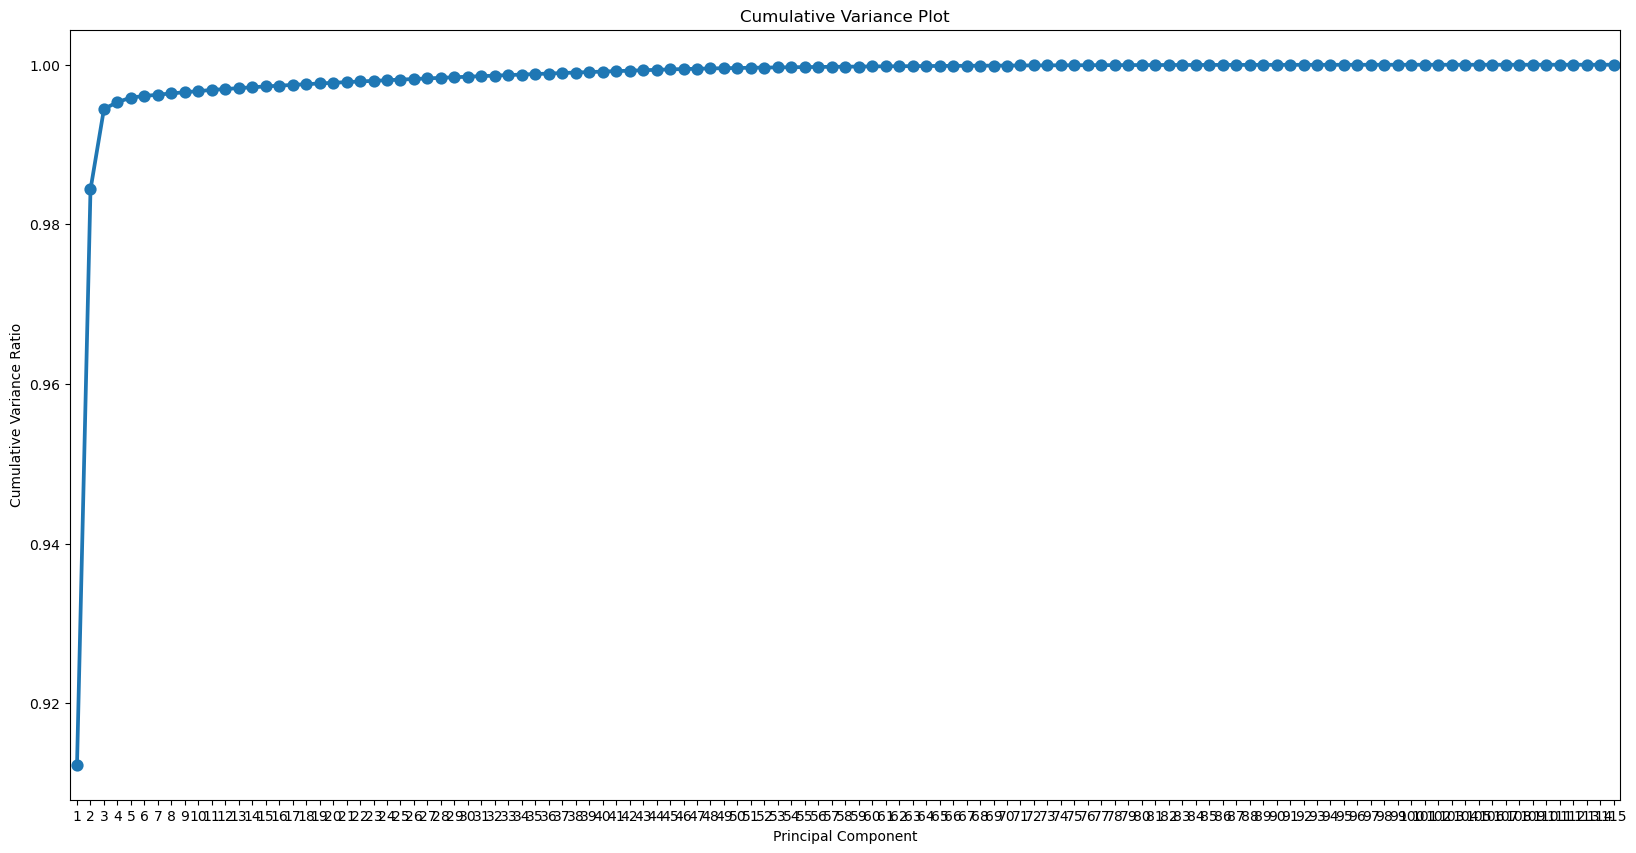

In [41]:
plt.figure(figsize=(20,10))
sns.pointplot(x='Principal Component', y= 'cumulative_variance', data=variance_df)
plt.title('Cumulative Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

Here the variance is explained upto 99% with the first 3-10 Principal Components ,lets choose 7 Principal components

In [42]:
pca = PCA(n_components = 7)
X_pca = pca.fit_transform(X)

In [43]:
X_pca.shape

(11295, 7)

In [44]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
oversample = SMOTE(random_state=9)
X_over, y_over = oversample.fit_resample(X_pca, y)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state = 1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [49]:
X_pca.shape, X_over.shape

((11295, 7), (21272, 7))

In [50]:
y.shape,y.sum()   # before sampling

((11295,), 659)

In [51]:
y_over.shape,y_over.sum() # after sampling

((21272,), 10636)

### Modeling
1. Different classification algorithms: Logistic Regression, Decision Tree, KNN, Random Forest, XGBoost, SVM are tested on the dataset. Grid Search technique is used to obtained best parameters for all the models.
2. The models performance were compared using the Confusion matrices, ROC curves , recall and F1- scores.
3. Since we want to minimize false negatives in insurance fraud detection to avoid significant financial loses for the insurer we can compare the recall(= True positives/(True positives+False negatives)) of different algorithms and choose the model with high recall rate.

In [52]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from xgboost import XGBClassifier 

In [69]:
def get_results(model,grid,CV):
    model_cv = GridSearchCV(estimator = model, param_grid = grid, cv = CV)
    model_cv.fit(scaled_X_train, y_train)
    model_preds = model_cv.predict(scaled_X_test)
    model_preds_proba = model_cv.predict_proba(scaled_X_test)
    
    print(classification_report(y_test, model_preds))
    print(model_cv.best_params_)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    skplt.metrics.plot_confusion_matrix(y_test, model_preds,ax=ax1)
    skplt.metrics.plot_roc_curve(y_test, model_preds_proba,ax=ax2)
    plt.show()

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      2649
           1       0.55      0.52      0.54      2669

    accuracy                           0.55      5318
   macro avg       0.55      0.55      0.55      5318
weighted avg       0.55      0.55      0.55      5318

{'C': 0.001, 'penalty': 'l2'}


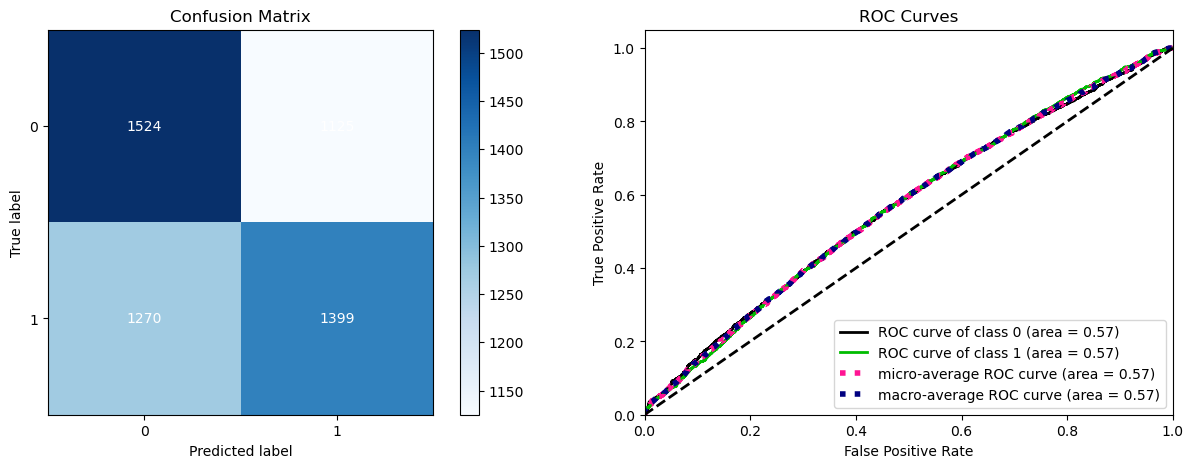

In [70]:
log_model = LogisticRegression()
grid = {"C": np.logspace(-3,3,7), "penalty": ["l1","l2"]}                 # Logistic Regression
get_results(log_model,grid,10)

              precision    recall  f1-score   support

           0       0.79      0.67      0.73      2649
           1       0.72      0.82      0.77      2669

    accuracy                           0.75      5318
   macro avg       0.75      0.75      0.75      5318
weighted avg       0.75      0.75      0.75      5318

{'C': 10}


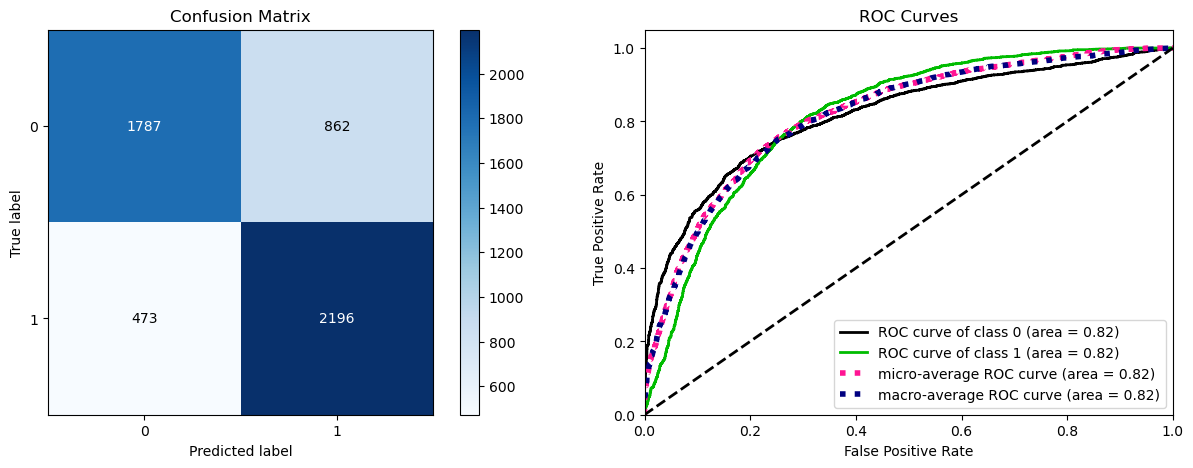

In [76]:
svm = SVC(probability = True)
grid = {'C': [0.1, 1, 10]}                                        # SVC 
get_results(svm,grid,5)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2649
           1       0.85      0.97      0.91      2669

    accuracy                           0.90      5318
   macro avg       0.91      0.90      0.90      5318
weighted avg       0.91      0.90      0.90      5318

{'n_neighbors': 1}


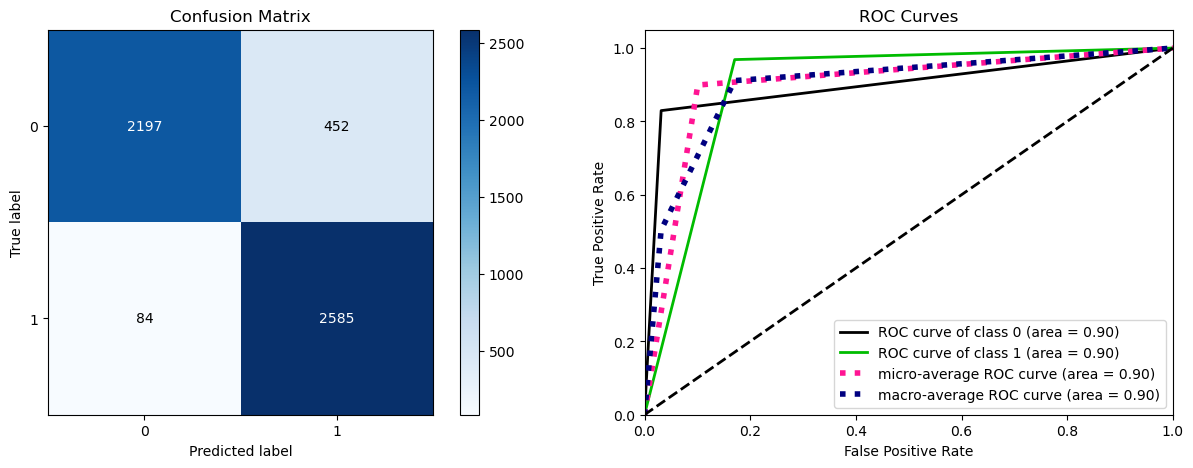

In [72]:
knn = KNeighborsClassifier()
grid = {'n_neighbors': range(1, 30) }                          # K Neighbours Classifier
get_results(knn,grid,10)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2649
           1       0.88      0.90      0.89      2669

    accuracy                           0.89      5318
   macro avg       0.89      0.89      0.89      5318
weighted avg       0.89      0.89      0.89      5318

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


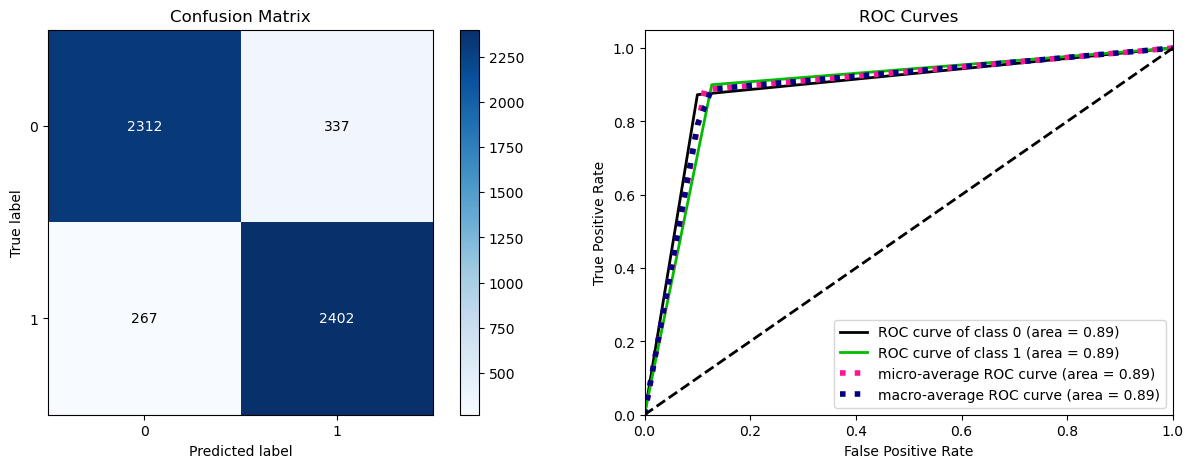

In [73]:
dtc = DecisionTreeClassifier()
grid = {'criterion' : ["gini", "entropy"], 'splitter' : ["best", "random"],           # DecisionTree Classifier
       'min_samples_leaf': range(1,6), 'min_samples_split': range(1,6)}
get_results(dtc,grid,10)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2649
           1       0.90      0.91      0.91      2669

    accuracy                           0.91      5318
   macro avg       0.91      0.91      0.91      5318
weighted avg       0.91      0.91      0.91      5318

{'n_estimators': 7}


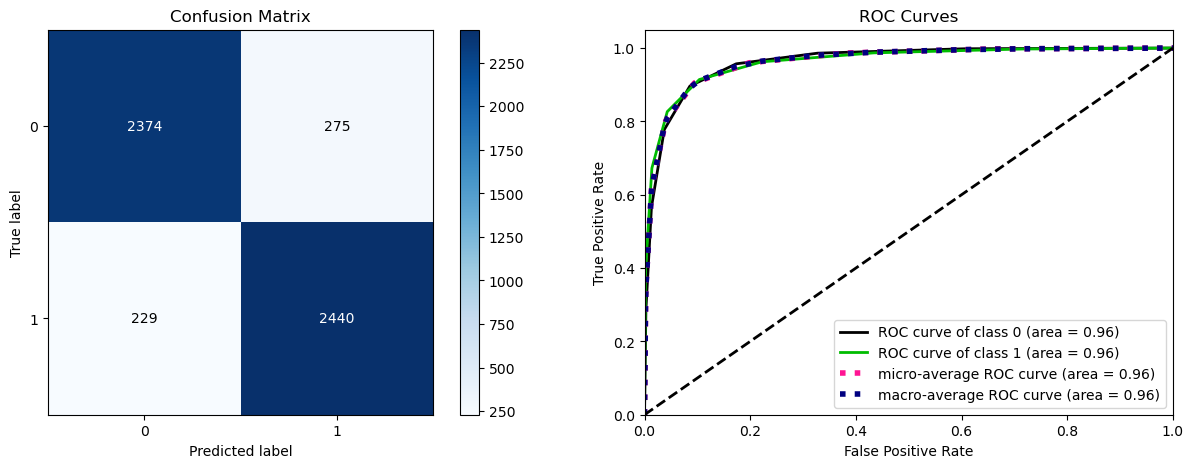

In [74]:
rf_model = RandomForestClassifier()
grid = {'n_estimators': [1,2,3,4,5,6,7]}                          # Random Forest Classifier
get_results(rf_model,grid,10)

              precision    recall  f1-score   support

           0       0.65      0.47      0.54      2649
           1       0.58      0.75      0.66      2669

    accuracy                           0.61      5318
   macro avg       0.62      0.61      0.60      5318
weighted avg       0.62      0.61      0.60      5318

{'max_depth': 2, 'max_leaves': 4, 'n_estimators': 7}


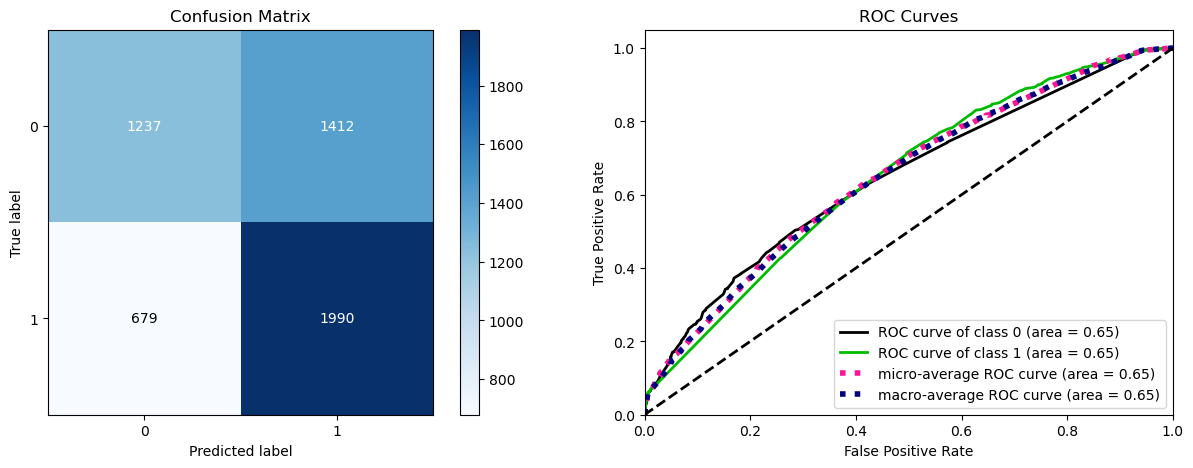

In [75]:
gb_model = XGBClassifier()
grid = {'n_estimators': [1,2,3,4,5,6,7], 'max_depth': [1,2,3,4,5,6,7], 'max_leaves': [1,2,3,4]}    #XGBoost Classsifier
get_results(gb_model,grid,10)

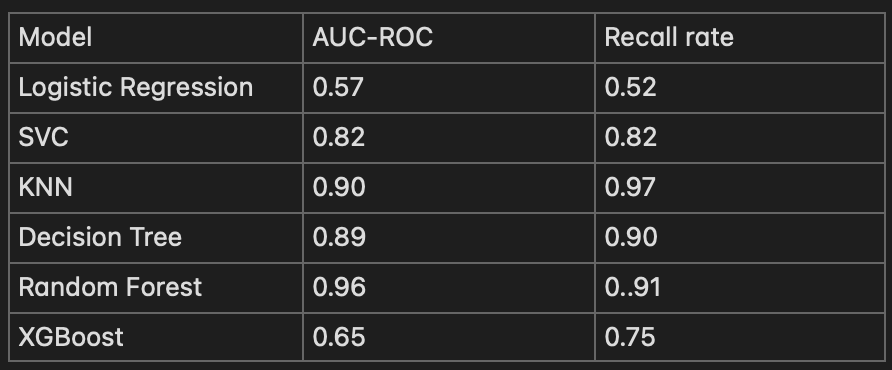

Out of different models tested Random Forest and KNN have the highest AUC-ROC and recall rate values.
Random Forest has a recall rate of 91% and AUC of 96% , KNN has a recall rate of 97% and AUC of 91% . Since our major criteria is to minimize false negatives we choose KNN as our final model.